In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
zip_data = "Project1_County_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [5]:
zip_data_df.describe()

,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Total educational attainment over 25,Never Married,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status
count,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
unique,3220,3175,308,3074,2982,2883,3219,2698,3219,2984,...,3132,2968,3219,3083,3219,2409,3216,2690,3219,3150
top,"Duval County, Texas",5806.0,41.0,48412.0,21177.0,634.0,6.521739130434782,1511,7.399103139013453,2155,...,15859.0,1694,25.54208011760382,3076,61.29032258064516,1105,7.709580838323353,2978,7.291666666666667,6776.0
freq,1,2,38,4,3,4,2,6,2,4,...,3,3,2,4,2,5,2,4,2,3


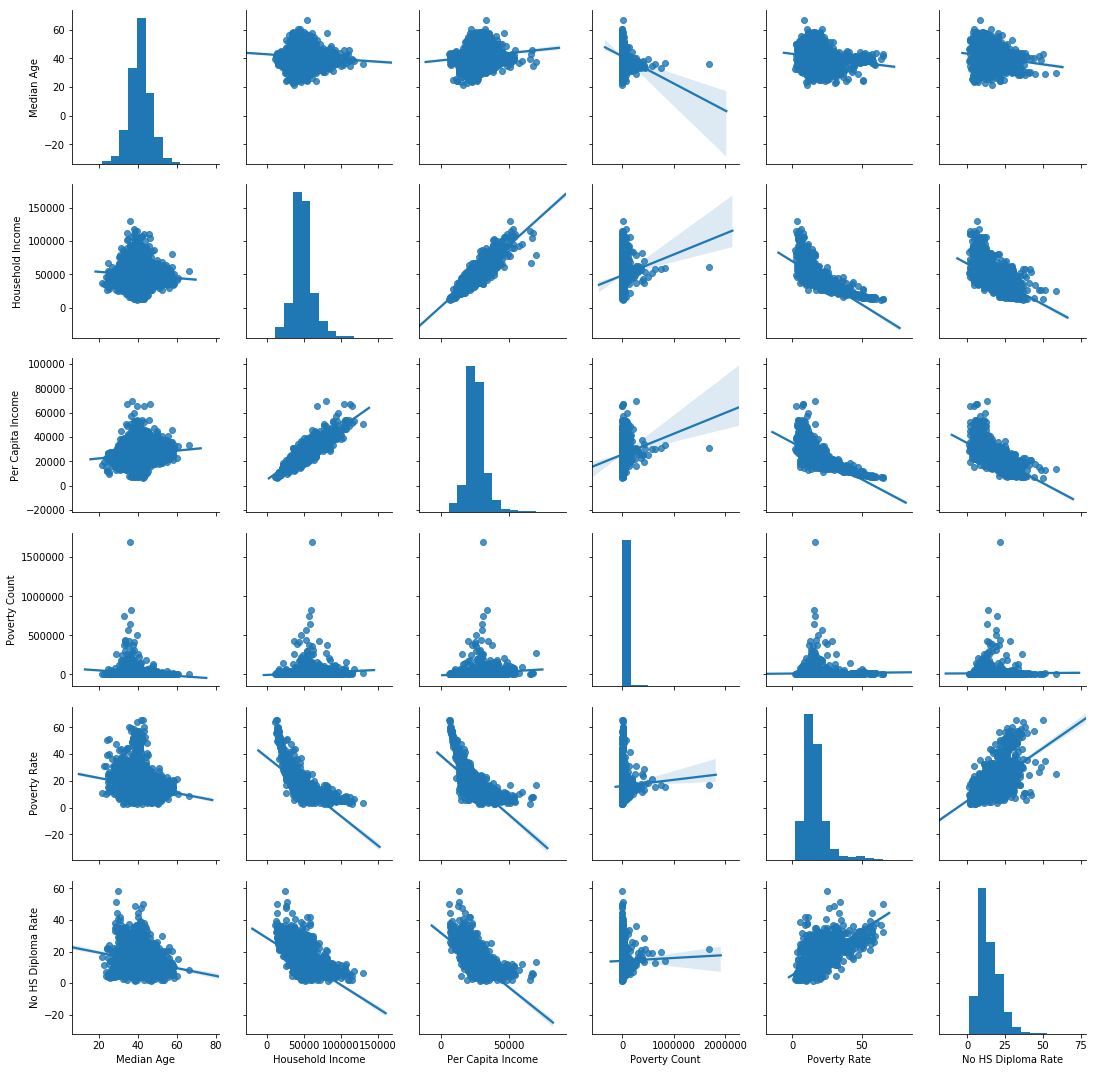

In [6]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "No HS Diploma Rate"]]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

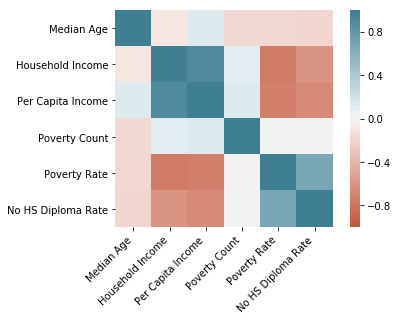

In [7]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

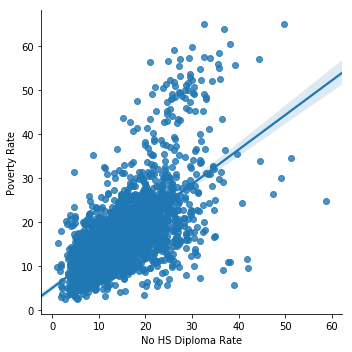

In [8]:
sns.lmplot(y='Poverty Rate', x='No HS Diploma Rate', data=census_data_numeric)

In [15]:
slope, intercept, r_value, p_value, std_err = sns.lmplot(x,y)
print ("r-squared:", r_value**2)


NameError: name 'x' is not defined